<a href="https://colab.research.google.com/github/OviedoMarco/DataScience/blob/MENU/BuyerPersonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arbol de Decisión para Clientes Solicitantes de Creditos

## Descripción

Este analisis es realizado para poder predecir un conjunto de caracteristicas del cliente que es relevante para aceptar un prestamo

## Carga de datos y librerias

Procedemos a cargar la base de datos de solicitudes del 2020-2021 para poder generar la limpieza de datos

In [ ]:
from google.colab import drive
drive.mount("/gdrive")


Mounted at /gdrive


Importamos pandas para cargar nuestra base

In [ ]:
import pandas as pd
pd.read_excel('/gdrive/MyDrive/Base Buyer Personas.xlsx')

Cargamos las librerias posteriores para las otras partes del analisis IA-MARKETING

In [ ]:
# cargamos librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_excel('/gdrive/MyDrive/Base Buyer Personas.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8340 entries, 0 to 8339
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Estatus                              8340 non-null   object        
 1   Fecha creaciÃ³n                      8340 non-null   datetime64[ns]
 2   Solicitante                          8340 non-null   object        
 3   Producto                             8340 non-null   object        
 4   Especialidad                         7209 non-null   object        
 5    Monto solicitado                    8340 non-null   float64       
 6   Responsable crÃ©dito                 2612 non-null   object        
 7   Responsable comercial                8294 non-null   object        
 8   Captura Ãºltima preaprobaciÃ³n       8340 non-null   object        
 9   Resultado Ãºltima preaprobaciÃ³n     8316 non-null   object        
 10  Sexo        

Vemos que tenemos 32 columnas de las cuales solo usaremos 8 de estas para el analisis, para no traerlas acarreando pues pueden afectarnos en un futuro creamos un nuevo dataframe que usaremos para aplicar el algoritmo IA

*   Estatus 
*   Fecha creaciÃ³n                        
*   Sexo 
*   Tipo de vivienda
*   Edad solicitante
*   Estado civil
*   FICO Score
*   Monto a financiar
*   Ingresos netos

In [ ]:
df2 = df.loc[:,['Estatus','Fecha creaciÃ³n','Sexo','Tipo de vivienda','Edad solicitante',
                'Estado civil','FICO Score','Monto a financiar','Ingresos netos']]
df2 = pd.DataFrame(df2)
df2

,Estatus,Fecha creaciÃ³n,Sexo,Tipo de vivienda,Edad solicitante,Estado civil,FICO Score,Monto a financiar,Ingresos netos
0,Rechazado,2020-01-01,MASCULINO,PROPIA,51.0,Casado,215.0,26000.0,16000.0
1,Rechazado,2020-01-02,MASCULINO,FAMILIAR,22.0,Soltero,170.0,35000.0,11000.0
2,Rechazado,2020-01-02,MASCULINO,PROPIA,48.0,Casado,215.0,34000.0,9000.0
3,Rechazado,2020-01-02,FEMENINO,FAMILIAR,40.0,Divorciado / Separado,195.0,60000.0,25000.0
4,Aceptado,2020-01-02,FEMENINO,FAMILIAR,29.0,Soltero,210.0,38000.0,24000.0
...,...,...,...,...,...,...,...,...,...
8335,Aceptado,2021-09-20,MASCULINO,PROPIA,20.0,10,15.0,NaN,NaN
8336,Rechazado,2021-09-20,FEMENINO,FAMILIAR,20.0,20,5.0,NaN,NaN
8337,Rechazado,2021-09-21,FEMENINO,PROPIA,20.0,20,15.0,NaN,NaN
8338,Rechazado,2021-09-22,MASCULINO,RENTADA,20.0,10,25.0,NaN,NaN


*   Tenemos una variable fecha
*   4 variables categoricas
*   4 variables númericas



## Analisis Exploratorio Detallado de los Datos (EDA)

El propósito de esta EDA es encontrar información que nos sirva más adelante en otro cuaderno para la limpieza / preparación / transformación de datos que finalmente se utilizará en un algoritmo de aprendizaje automático

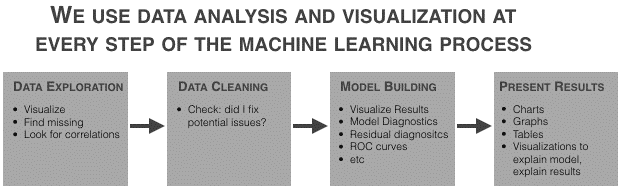

Donde cada paso (exploración de datos, limpieza de datos, construcción de modelos, presentación de resultados) pertenecerá a 1 cuaderno. Escribiré muchos detalles en este cuaderno (incluso algunos que pueden parecer obvios por naturaleza), como principiante es importante para mí hacerlo.

In [ ]:
df2.dtypes

Estatus                      object
Fecha creaciÃ³n      datetime64[ns]
Sexo                         object
Tipo de vivienda             object
Edad solicitante            float64
Estado civil                 object
FICO Score                  float64
Monto a financiar           float64
Ingresos netos              float64
dtype: object

Vemos que tenemos valores nulos, y tenemos mayor foco en ingresos netos y monto a financiar
No queremos perder esta informacion puesto que son 288 creditos, procdemos a usar una tecnica de estandarizacion para crear suficiencia media de los valores parametricos

In [ ]:
df2.head()

,Estatus,Fecha creaciÃ³n,Sexo,Tipo de vivienda,Edad solicitante,Estado civil,FICO Score,Monto a financiar,Ingresos netos
0,Rechazado,2020-01-01,MASCULINO,PROPIA,51.0,Casado,215.0,26000.0,16000.0
1,Rechazado,2020-01-02,MASCULINO,FAMILIAR,22.0,Soltero,170.0,35000.0,11000.0
2,Rechazado,2020-01-02,MASCULINO,PROPIA,48.0,Casado,215.0,34000.0,9000.0
3,Rechazado,2020-01-02,FEMENINO,FAMILIAR,40.0,Divorciado / Separado,195.0,60000.0,25000.0
4,Aceptado,2020-01-02,FEMENINO,FAMILIAR,29.0,Soltero,210.0,38000.0,24000.0


In [ ]:
plt.style.use('bmh')
# null values
df2.isnull().sum().sort_values(ascending=False)

Ingresos netos       288
Monto a financiar    288
FICO Score             6
Estado civil           6
Edad solicitante       6
Tipo de vivienda       1
Sexo                   0
Fecha creaciÃ³n        0
Estatus                0
dtype: int64

Mas adelante presentaremos una mejor manera de preparar los datos para convertir los datos faltantes en datos predictores para no perderlos, seguiremos avanzando en los datos para conocerlos de mejor manera

count    8334.000000
mean       37.028318
std        12.362244
min        18.000000
25%        28.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: Edad solicitante, dtype: float64


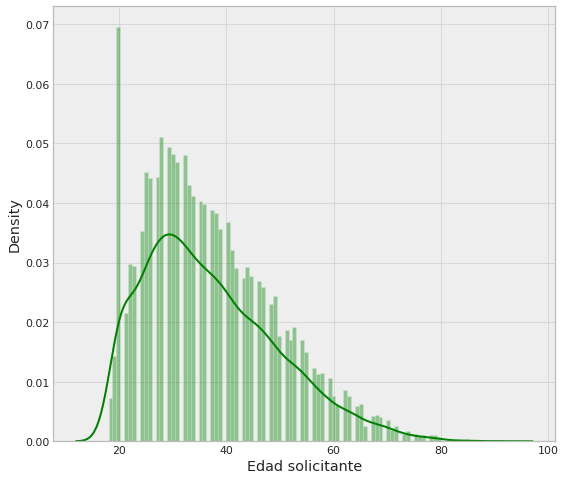

In [ ]:
print(df['Edad solicitante'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Edad solicitante'], color='g', bins=100, hist_kws={'alpha': 0.4});

Con esta información, podemos ver que los precios están sesgados a la derecha (si analizamos con exactitud vemos que los datos empiezan a sesgar a partir de los 80 años este es un dato importanto pues pueden causar conflictos a la hora de analizar, entonces tendremos que estandarizar algunas variables de edad) y algunos valores atípicos se encuentran por encima de 80 años. Eventualmente querremos deshacernos de ellos para obtener una distribución normal de la variable independiente (`Edad solicitante`) para el aprendizaje automático.


Nota: La edad de los solicitantes se concentra de los 25 a los 40 años

Veamos como se comporta el monto a financiar que más se solicita 

count      8052.000000
mean      48390.380340
std       61937.286888
min        4000.000000
25%       16000.000000
50%       30000.000000
75%       60000.000000
max      600000.000000
Name: Monto a financiar, dtype: float64


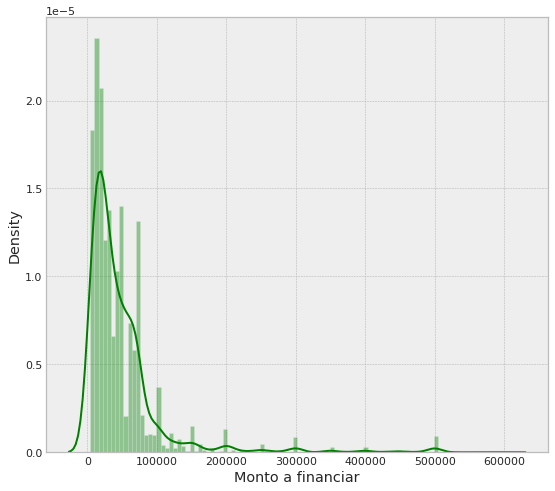

In [ ]:
print(df['Monto a financiar'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Monto a financiar'], color='g', bins=100, hist_kws={'alpha': 0.4});

Podemos ver que los Montos a financiar están sesgados a la derecha y algunos valores atípicos se encuentran por encima de 150,000 pesos. Como mencionamos anteriormente  querremos deshacernos de ellos para obtener una distribución normal de la variable independiente (`Monto a financiar`) para el aprendizaje automático.


Nota: La edad de los solicitantes se concentra menor de los 60,000 pesos a financiar

### Distribución de datos numéricos
Para esta parte, veamos la distribución de todas las características trazándolas

Para hacerlo, primero enumeremos todos los tipos de nuestros datos de nuestro conjunto de datos y tomemos solo los numéricos:

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('<M8[ns]'), dtype('O'), dtype('float64')]

In [ ]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Edad solicitante,FICO Score,Monto a financiar,Ingresos netos
0,51.0,215.0,26000.0,16000.0
1,22.0,170.0,35000.0,11000.0
2,48.0,215.0,34000.0,9000.0
3,40.0,195.0,60000.0,25000.0
4,29.0,210.0,38000.0,24000.0


Ahora grafiquemos todos:

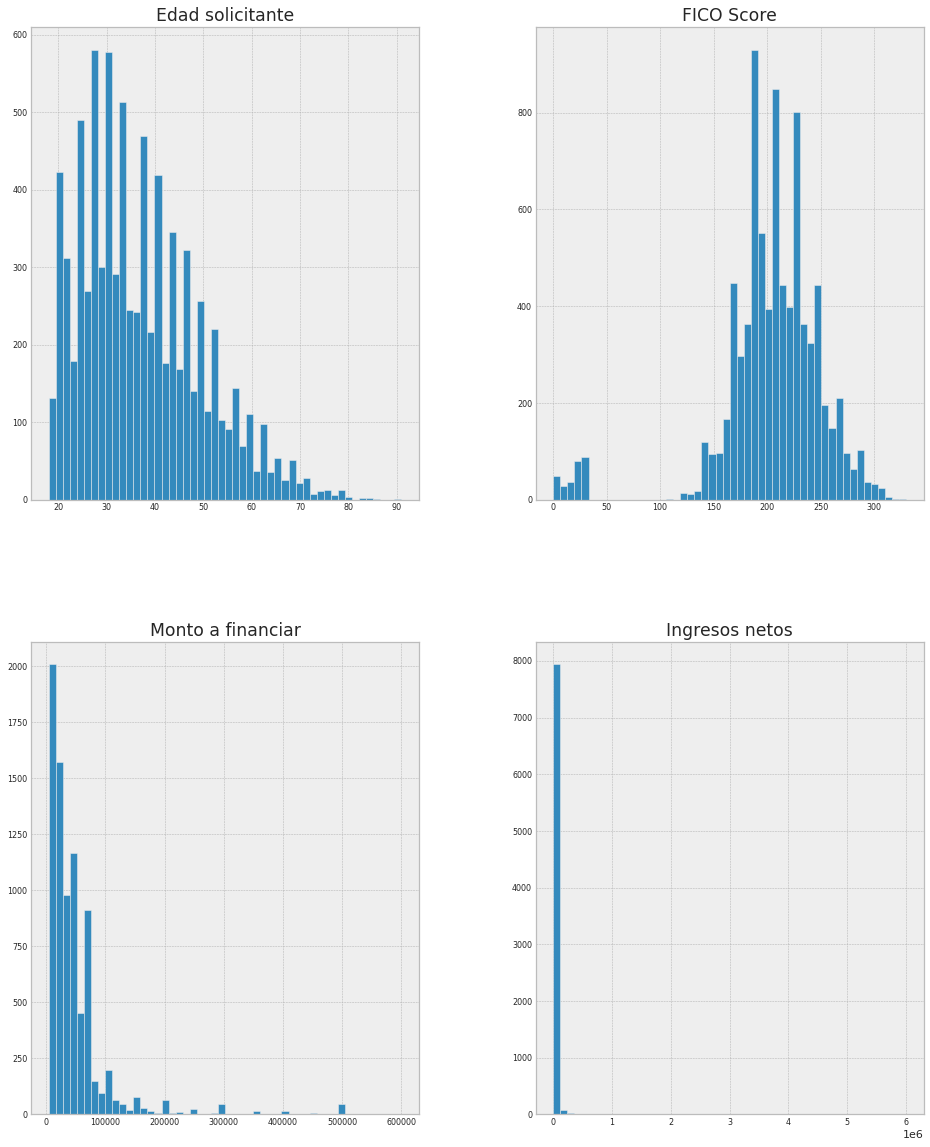

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Correlación
Ahora intentaremos encontrar qué características están fuertemente correlacionadas con Fico Score. Los almacenaremos en una var llamada golden_features_list. Reutilizaremos nuestro conjunto de datos df_num para hacerlo.

In [ ]:
df_num_corr = df_num.corr()['FICO Score'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("Hay {} variables numericas fuertemente correlacionadas con FICO Score:\n{}".format(len(golden_features_list), golden_features_list))

Hay 2 variables numericas fuertemente correlacionadas con FICO Score:
FICO Score          1.000000
Edad solicitante    0.526058
Name: FICO Score, dtype: float64


Perfecto, ahora tenemos una lista de valores fuertemente correlacionados, pero esta lista está incompleta ya que sabemos que la correlación se ve afectada por valores atípicos. Entonces podríamos proceder de la siguiente manera:

Tracemos las características numéricas y veamos cuáles tienen muy pocos valores atípicos explicables.
Elimine los valores atípicos de estas características y vea cuál puede tener una buena correlación sin sus valores atípicos
Por cierto, la correlación por sí misma no siempre explica la relación entre los datos, por lo que trazarlos incluso podría llevarnos a nuevos conocimientos y, de la misma manera, verificar que nuestros valores correlacionados tengan una relación lineal con el precio de venta.

Por ejemplo, relaciones como la relación curvilínea no se pueden adivinar con solo mirar el valor de correlación, así que tomemos las características que excluimos de nuestra tabla de correlación y grafíquelas para ver si muestran algún tipo de patrón.

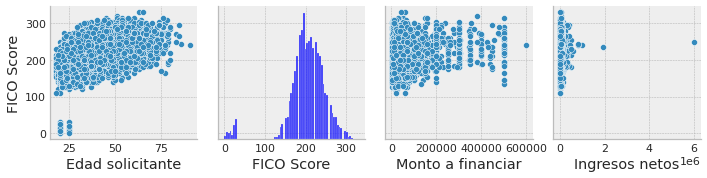

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['FICO Score'])

Por el momneto solo observamos que la unica variable que esta fuertemente correlacionada con el FICO Score es la edad
Con las otras variables solo podemos determinar que tenemos pocos clientes que solicitan creditos mayores de 200,000 teniendo estos un poco mas altos sus FICO score

### Conclusión:
*   La edad esta fuertemente correlacionada para tener un buen FICO Score
*   Observamos una distribucion de Financiacion muy dispersa

Estos dos puntos son los mas concluyentes en este analisis, pero aun falta mucho por recorrer pues sabemos muy bien que solo se analizo las variables numericas






---




Para poder determinar mejores correlaciones de toda nuestra data veamos una grafica de matriz de correlacion

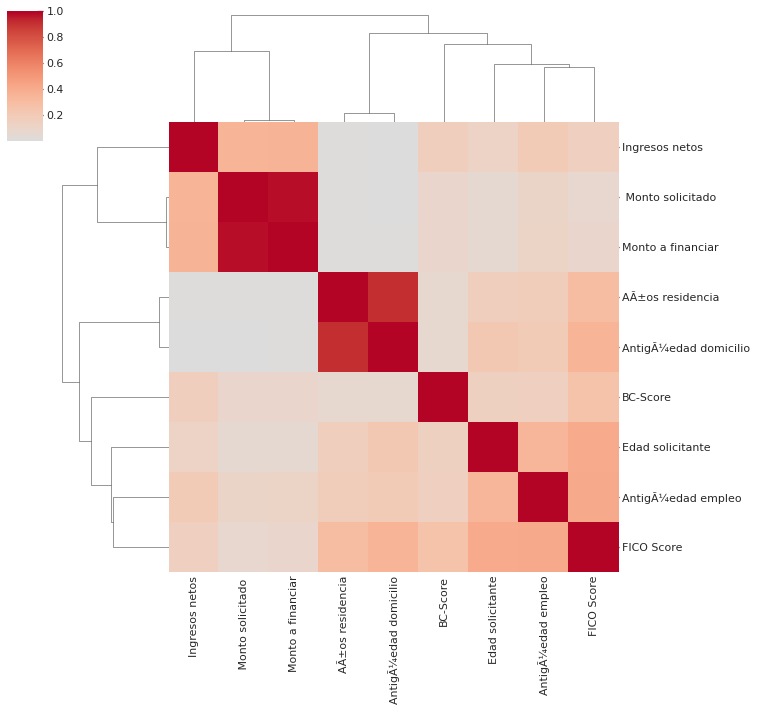

In [ ]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='Estatus').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

Con la grafica anterior de matriz de correlaciones podemos determinar unos casos un poco obvios pero no esta de más el mencionarlos
donde cumple una mayor correlacion de los datos en FICO, edad, antiguedad del empleo, años de residencia y podemos observar la correlacion que tiene tener un alto BC-Score con el FICO Score

In [ ]:
df2.fillna(df.mean())

In [ ]:
df= df.drop(['Calle', 'Responsable comercial', 'Especialidad',
         'BC-Score', 'Responsable crÃ©dito', 'Capacidad de pago',
         'Monto a financiar', 'Ingresos netos', '# Revolving trade lines now current',
         'Resultado Ãºltima preaprobaciÃ³n','Codigo postal','Maximum deliquency ever',
         '# Trade lines 90+ ever','# Satisfactory ratings'], axis=1)
# null values
df.isnull().sum().sort_values(ascending=False)

FICO Score                        7
AntigÃ¼edad empleo                7
Tipo de contrato                  7
AntigÃ¼edad domicilio             7
Estado civil                      7
Edad solicitante                  7
Estado                            1
Municipio                         1
Colonia                           1
Tipo de vivienda                  1
AÃ±os residencia                  1
SCORE Folio                       1
Sexo                              0
Captura Ãºltima preaprobaciÃ³n    0
Monto solicitado                  0
Producto                          0
Solicitante                       0
Fecha creaciÃ³n                   0
Estatus                           0
dtype: int64

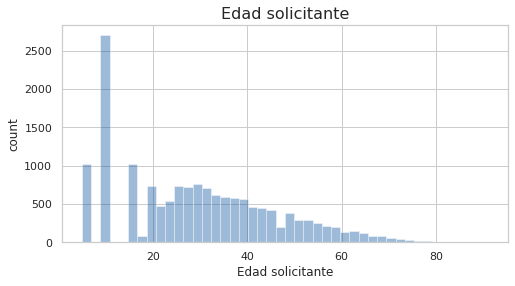

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['Edad solicitante'], kde=False, hist=True)
plt.title('Edad solicitante', size=16)
plt.ylabel('count');

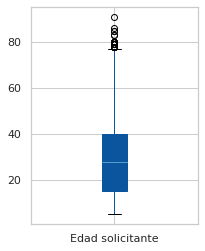

In [ ]:
df['Edad solicitante'].plot(kind='box', figsize=(3,4), patch_artist=True)

In [ ]:
df['Edad solicitante'] = df['Edad solicitante'].fillna(df['Edad solicitante'].median())
df['FICO Score'] = df['FICO Score'].fillna(df['FICO Score'].median())
df['AntigÃ¼edad domicilio'] = df['AntigÃ¼edad domicilio'].fillna(df['AntigÃ¼edad domicilio'].median())
df['AntigÃ¼edad empleo'] = df['AntigÃ¼edad empleo'].fillna(df['AntigÃ¼edad empleo'].median())
df['AÃ±os residencia'] = df['AÃ±os residencia'].fillna(df['AÃ±os residencia'].median())

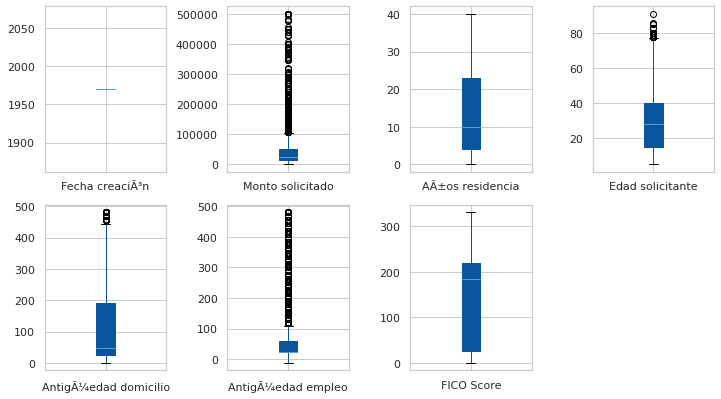

In [ ]:
# select columns to plot
df_to_plot = df.drop(columns=[]).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15749 entries, 0 to 15748
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estatus                         15749 non-null  object 
 1   Fecha creaciÃ³n                 15749 non-null  float64
 2   Solicitante                     15749 non-null  object 
 3   Producto                        15749 non-null  object 
 4   Monto solicitado                15749 non-null  float64
 5   Captura Ãºltima preaprobaciÃ³n  15749 non-null  object 
 6   Sexo                            15749 non-null  object 
 7   Estado                          15748 non-null  object 
 8   Municipio                       15748 non-null  object 
 9   Colonia                         15748 non-null  object 
 10  Tipo de vivienda                15748 non-null  object 
 11  AÃ±os residencia                15749 non-null  float64
 12  SCORE Folio                     

In [ ]:
df= df.dropna()

In [ ]:
df['Fecha creaciÃ³n'] = pd.to_datetime(df['Fecha creaciÃ³n'])

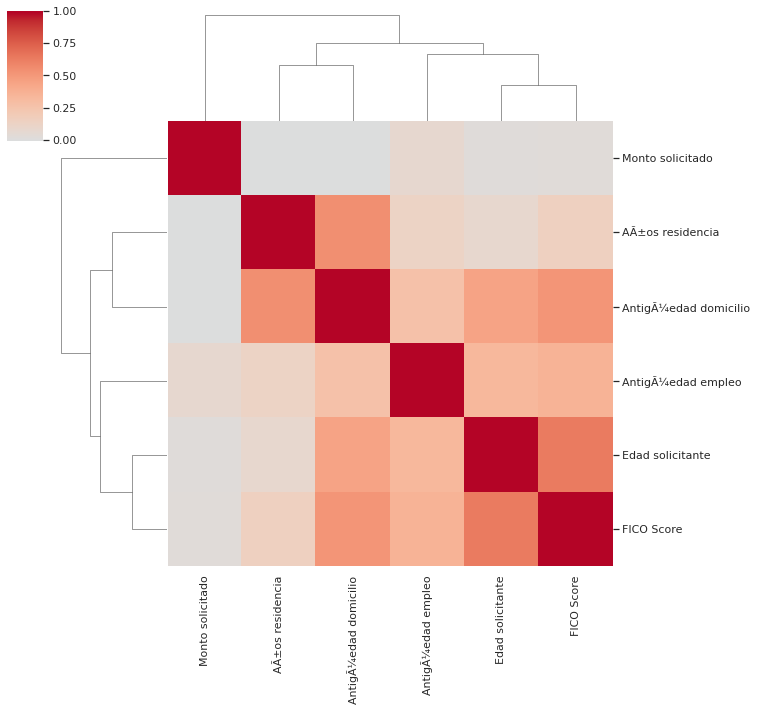

In [ ]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='Estatus').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

In [ ]:
df['Fecha creaciÃ³n'] = pd.DatetimeIndex(df['Fecha creaciÃ³n']).year
df[['Fecha creaciÃ³n']].head()

,Fecha creaciÃ³n
0,1970
1,1970
2,1970
3,1970
4,1970


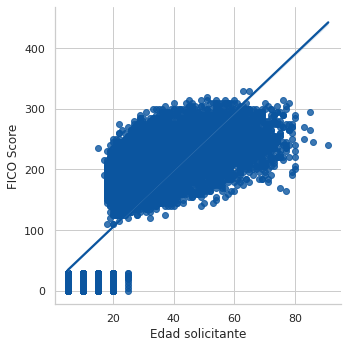

In [ ]:
sns.lmplot(x='Edad solicitante', y='FICO Score', data=df[df['Edad solicitante'] < 200000]);

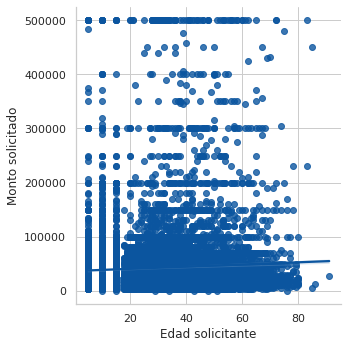

In [ ]:
sns.lmplot(x='Edad solicitante', y='Monto solicitado', data=df[df['Edad solicitante'] < 200000]);

In [ ]:
X= df.iloc[:, [13,18]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


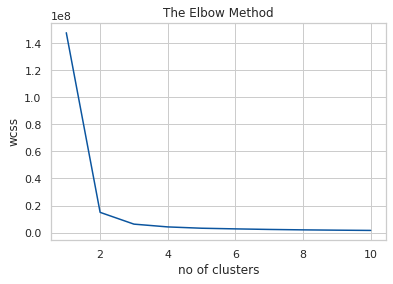

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

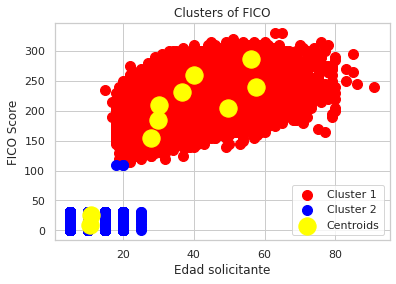

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of FICO')
plt.xlabel('Edad solicitante')
plt.ylabel('FICO Score')
plt.legend()
plt.show()

In [ ]:
df2 = df.rename(columns={'FICO Score':'FICO'})
df2.columns

In [ ]:
def out_zscore(df2):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(df2)
    std = np.std(df2)
    for i in df2:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [ ]:
out_zscore(df2.FICO)

Total number of outliers are 0


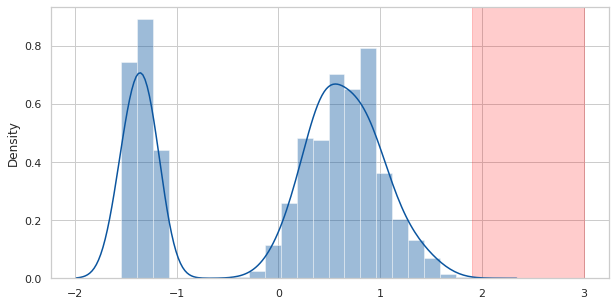

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(df2['Edad solicitante'])

TypeError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
df2 = out_std(df2,'Edad solicitante')

The lower bound value is -20.845661540497566
The upper bound value is 78.86357540150632
Total number of outliers are 20
